# Total work effort in Denmark compared to other OECD countries

Imports and set magics:

In [3]:
#pip install pandasdmx
#pip install geopandas

In [3]:
import pandas as pd
import pandasdmx as pdmx
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import geopandas as gpd
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

In this data project we will investigate the total work effort in Denmark. In relation to this we investigate how the working hours per person employed in OECD countries have evolved over time and especially how Denmark performs compared to the other OECD countries. Additionaly, we explore the relationship between employment rates and working hours per person employed across OECD countries. 

The two used datasets for the analysis is imported from the OECD database (https://data.oecd.org). Both datasets contain annual data from 2008 to 2022. We employ the following datasets:
-  **Level of GDP per capita and productivity - Average hours worked per person employed:** The dataset contains data on average hours worked per person employed measured as hours per year in OECD countries. 
- **Short-Term Labour Market Statistics - Employment Rate:** The dataset contains data on employment rates measured as the percentage of 15-64 year olds who are employed in each OECD country. The dataset contains employment rates for females, males and all. 

Importing data on employment rates:

In [4]:
# Fetching data
emplrate = dataproject.fetching_data_emplrate()
emplrate.head()

,LOCATION,SUBJECT,MEASURE,FREQUENCY,TIME_PERIOD,value
0,AUS,LREM64FE,STSA,A,2008,66.71808
1,AUS,LREM64FE,STSA,A,2009,66.30235
2,AUS,LREM64FE,STSA,A,2010,66.14607
3,AUS,LREM64FE,STSA,A,2011,66.65070
4,AUS,LREM64FE,STSA,A,2012,66.57001


Cleaning the data:

In [5]:
# Drop measure and frequency
emplrate.drop(['MEASURE', 'FREQUENCY'], axis=1, inplace=True) 

# Rename 
emplrate.rename(columns = {'TIME_PERIOD':'YEAR', 'value':'EMPLRATE'}, inplace=True)
emplrate['SUBJECT'].replace({'LREM64FE': 'Female', 'LREM64MA': 'Male', 'LREM64TT': 'All'}, inplace=True)
emplrate

,LOCATION,SUBJECT,YEAR,EMPLRATE
0,AUS,Female,2008,66.71808
1,AUS,Female,2009,66.30235
2,AUS,Female,2010,66.14607
3,AUS,Female,2011,66.65070
4,AUS,Female,2012,66.57001
...,...,...,...,...
1711,CRI,All,2019,61.64743
1712,CRI,All,2020,54.83073
1713,CRI,All,2021,57.15372
1714,CRI,All,2022,60.05968


Importing data on average hours worked per person employed:

In [6]:
# Fetching data
hours = dataproject.fetching_data_hours()
hours.head()

,LOCATION,SUBJECT,MEASURE,TIME_PERIOD,value
0,AUS,T_HRSAV,PEHRS,2008,1753.556685
1,AUS,T_HRSAV,PEHRS,2009,1779.140915
2,AUS,T_HRSAV,PEHRS,2010,1755.149446
3,AUS,T_HRSAV,PEHRS,2011,1771.541297
4,AUS,T_HRSAV,PEHRS,2012,1759.612242


Cleaning the data:

In [7]:
# Drop subject and measure
hours.drop(['SUBJECT', 'MEASURE'], axis=1, inplace=True) 

# Rename 
hours.rename(columns = {'TIME_PERIOD':'YEAR', 'value':'AVHRS'}, inplace=True)
hours

,LOCATION,YEAR,AVHRS
0,AUS,2008,1753.556685
1,AUS,2009,1779.140915
2,AUS,2010,1755.149446
3,AUS,2011,1771.541297
4,AUS,2012,1759.612242
...,...,...,...
563,COL,2018,2385.939332
564,COL,2019,2382.611241
565,COL,2020,2069.438776
566,COL,2021,2405.385474


## Explore each data set

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

In [40]:

# Function to compute descriptive statistics for a selected country and gender
def descriptive_stats(country, gender):
    # Filter data for the selected country and gender
    country_gender_data_empl = emplrate[(emplrate['LOCATION'] == country) & (emplrate['SUBJECT'] == gender)]
    country_data_hours = hours[hours['LOCATION'] == country]

    # Employment Rate statistics
    mean_emplrate = country_gender_data_empl['EMPLRATE'].mean()
    median_emplrate = country_gender_data_empl['EMPLRATE'].median()
    p25_emplrate = country_gender_data_empl['EMPLRATE'].quantile(0.25)
    p75_emplrate = country_gender_data_empl['EMPLRATE'].quantile(0.75)
    max_emplrate = country_gender_data_empl['EMPLRATE'].max()
    min_emplrate = country_gender_data_empl['EMPLRATE'].min()
    max_year_empl = country_gender_data_empl[country_gender_data_empl['EMPLRATE'] == max_emplrate]['YEAR'].iloc[0]
    min_year_empl = country_gender_data_empl[country_gender_data_empl['EMPLRATE'] == min_emplrate]['YEAR'].iloc[0]

    # Hours Worked statistics
    mean_hours = country_data_hours['AVHRS'].mean()
    median_hours = country_data_hours['AVHRS'].median()
    p25_hours = country_data_hours['AVHRS'].quantile(0.25)
    p75_hours = country_data_hours['AVHRS'].quantile(0.75)
    max_hours = country_data_hours['AVHRS'].max()
    min_hours = country_data_hours['AVHRS'].min()
    max_year_hours = country_data_hours[country_data_hours['AVHRS'] == max_hours]['YEAR'].iloc[0]
    min_year_hours = country_data_hours[country_data_hours['AVHRS'] == min_hours]['YEAR'].iloc[0]

    # Prepare data for display
    stats_emplrate = pd.DataFrame({
        'Statistic': [
            'Mean Employment Rate', 'Median Employment Rate', 'P25 Employment Rate', 'P75 Employment Rate',
            'Max Employment Rate', 'Min Employment Rate'
        ],
        'Value': [
            mean_emplrate, median_emplrate, p25_emplrate, p75_emplrate,
            max_emplrate, min_emplrate
        ],
        'Year': [
            '', '', '', '',
            max_year_empl, min_year_empl
        ]
    })

    stats_hours = pd.DataFrame({
        'Statistic': [
            'Mean Hours Worked', 'Median Hours Worked', 'P25 Hours Worked', 'P75 Hours Worked',
            'Max Hours Worked', 'Min Hours Worked'
        ],
        'Value': [
            mean_hours, median_hours, p25_hours, p75_hours,
            max_hours, min_hours
        ],
        'Year': [
            '', '', '', '',
            max_year_hours, min_year_hours
        ]
    })

    # Display the DataFrames side by side
    html = (
        stats_emplrate.to_html(index=False) +
        "<br>" +
        stats_hours.to_html(index=False)
    )
    display(HTML(html))

# Dropdown widget for country selection
countries = emplrate['LOCATION'].unique()
country_dropdown = widgets.Dropdown(options=countries, description='Country:')

# Dropdown for gender selection
gender_dropdown = widgets.Dropdown(options=['All', 'Male', 'Female'], value='All', description='Gender:')

# Define interactive widget to update stats based on dropdown selections
widgets.interactive(descriptive_stats, country=country_dropdown, gender=gender_dropdown)


interactive(children=(Dropdown(description='Country:', options=('AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN…

The hours worked statistics has no gender diveded information, and therefore the gender dropdown menu only works for the Employment rate.

To further analyse the data we create an interactive plot that illustrates the employments rates of 2022 across OECD countries with a drop down menu that enables the graph to show employment rates for males, females and all, respectively. This shows which countries are included in the 'emplrate' dataset and indicates the differences in employment rates across OECD countries:

In [10]:
# Import world map data
worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

def create_map_emplrate(gender):
    # Looking at employment rates in 2022
    emplrate_map = emplrate[(emplrate['SUBJECT'] == gender) & (emplrate['YEAR'] == '2022')]

    # Merge employment rate data and world map data
    mapdata_emplrate = pd.merge(worldmap, emplrate_map, how="left", left_on='iso_a3', right_on='LOCATION')

    # Plot the map
    fig, ax = plt.subplots(1, 1, figsize=(20, 16))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad="0.5%")
    mapdata_emplrate.plot(column="EMPLRATE", ax=ax, cax=cax, cmap='OrRd', legend=True, legend_kwds={"label": f"Employment rate in 2022 for {gender} (%)"}, missing_kwds={'color':'lightgrey'}, vmin=45, vmax=85)
    ax.set_title(f'Employment rate for OECD countries in 2022', size=20)
    plt.show()

# Dropdown menu 
gender_dropdown = widgets.Dropdown(options=['All', 'Male', 'Female'], value='All', description='Gender:')
widgets.interactive(create_map_emplrate, gender=gender_dropdown)

C:\Users\theis\AppData\Local\Temp\ipykernel_10400\2313733407.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


interactive(children=(Dropdown(description='Gender:', options=('All', 'Male', 'Female'), value='All'), Output(…

Another world map illustrates the average hours worked per person employed in 2022 across OECD countries. This shows which countries are included in the 'hours' dataset and indicates the differences in working hours across OECD countries:

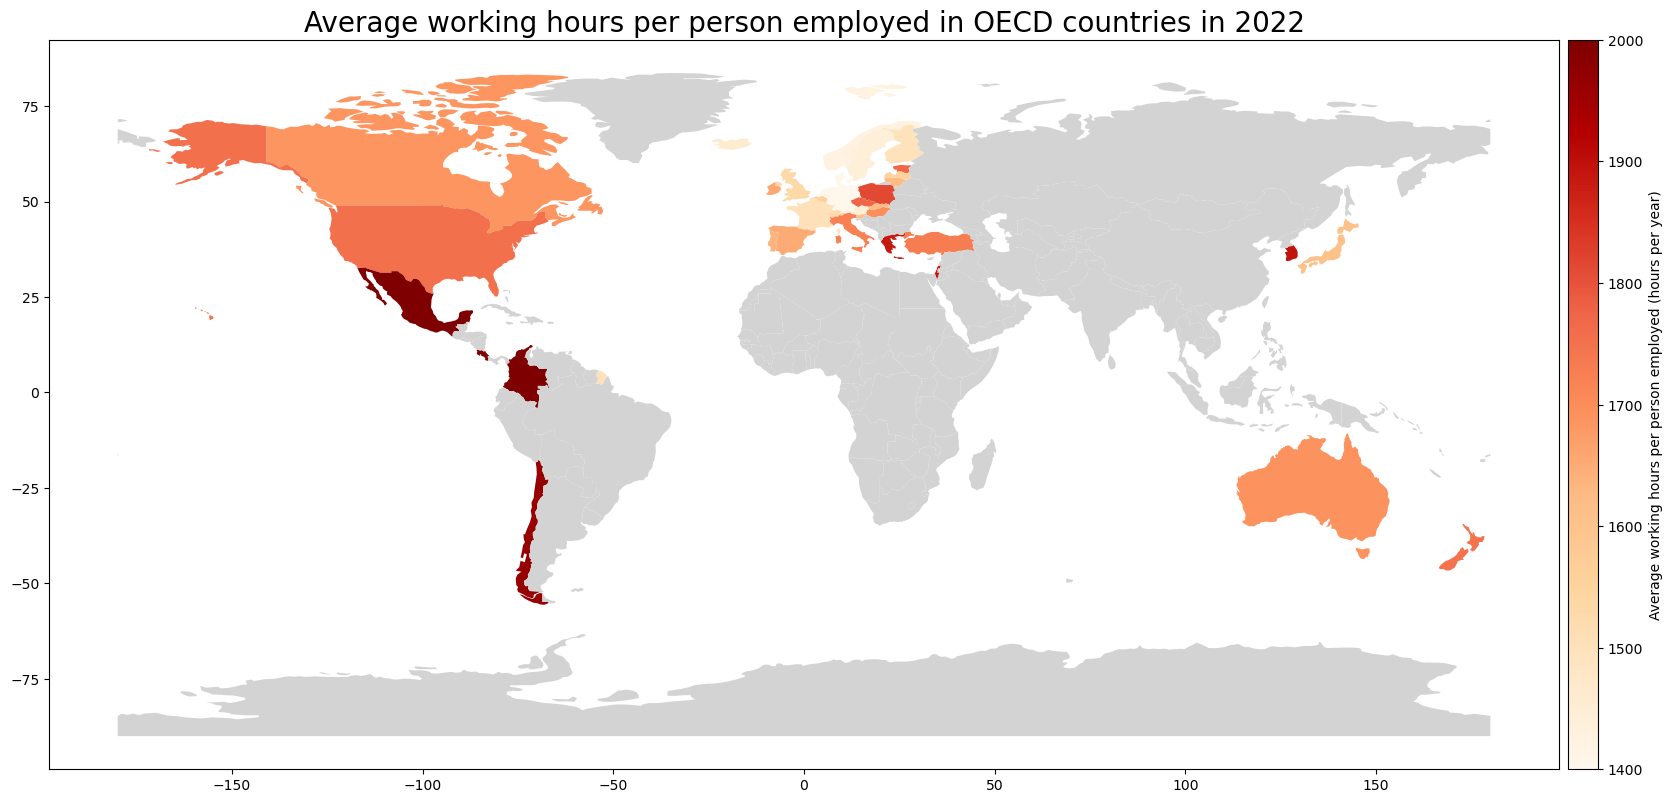

In [11]:
# Looking at working hours in 2022
hours_map = hours[hours['YEAR'] == '2022']

# Merge employment rate data and world map data
mapdata_hours = pd.merge(worldmap, hours_map, how="left", left_on='iso_a3', right_on='LOCATION')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(20, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad="0.5%")
mapdata_hours.plot(column="AVHRS", ax=ax, cax=cax, cmap='OrRd', legend=True, legend_kwds={"label": f"Average working hours per person employed (hours per year)"}, missing_kwds={'color':'lightgrey'}, vmin=1400, vmax=2000)
ax.set_title(f'Average working hours per person employed in OECD countries in 2022', size=20)
plt.show()

# Merge data sets

Merge the datasets on employment rates and average hours per person employed in OECD countries. We do an inner merge because we only want to keep observations where both an employment rate and average working hours exists:

In [12]:
#Merge the two dataset
data_merged = pd.merge(emplrate,hours,how='inner',on=['LOCATION','YEAR'])
data_merged

,LOCATION,SUBJECT,YEAR,EMPLRATE,AVHRS
0,AUS,Female,2008,66.71808,1753.556685
1,AUS,Male,2008,79.68430,1753.556685
2,AUS,All,2008,73.20431,1753.556685
3,AUS,Female,2009,66.30235,1779.140915
4,AUS,Male,2009,77.78976,1779.140915
...,...,...,...,...,...
1684,CRI,Male,2021,70.10255,2080.563075
1685,CRI,All,2021,57.15372,2080.563075
1686,CRI,Female,2022,47.06725,2155.727768
1687,CRI,Male,2022,72.85931,2155.727768


# Analysis

We plot the average hours worked per person employed over time for each of the OECD countries in the analysis to get an idea of how the working hours have evolved across time:

In [29]:
# Define function to update plot based on selected LOCATION
def update_plot(location):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1,1,1)
    ax.plot(data_merged[(data_merged['LOCATION'] == location) & (data_merged['SUBJECT'] == 'All')]['YEAR'], 
            data_merged[(data_merged['LOCATION'] == location) & (data_merged['SUBJECT'] == 'All')]['AVHRS'])
    ax.set_xlabel('Year')
    ax.set_ylabel('Average hours worked per person employed (hours per year)')
    ax.set_title(f'Average hours worked per person employed across time for {location}')
    plt.show()

# Create dropdown menu for selecting LOCATION
location_dropdown = widgets.Dropdown(options=data_merged['LOCATION'].unique(), value='DNK', description='Location:')

# Define interactive widget to update plot based on dropdown selection
widgets.interactive(update_plot, location=location_dropdown)

interactive(children=(Dropdown(description='Location:', index=5, options=('AUS', 'AUT', 'BEL', 'CAN', 'CZE', '…

There is a general trend in OECD countries where working hours per person employed have declined in the period 2008-2022. 

In a scatterplot the employments rate is plotted against the average hours worked in 2022 for all OECD countries:

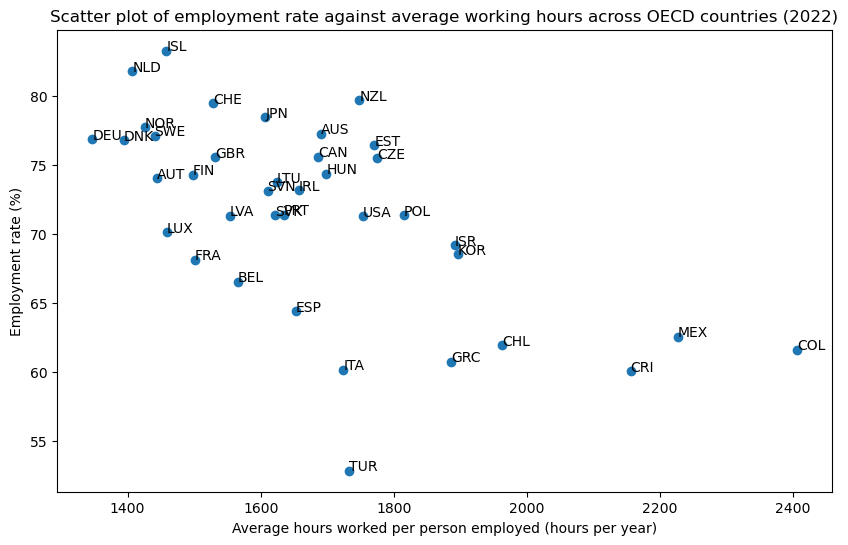

In [30]:
# Plot employment rates across average working hours per person employed
plt.figure(figsize=(10, 6))
plt.scatter(x=data_merged[(data_merged['SUBJECT'] == 'All') & (data_merged['YEAR'] == '2022')]['AVHRS'], 
            y=data_merged[(data_merged['SUBJECT'] == 'All') & (data_merged['YEAR'] == '2022')]['EMPLRATE'])

plt.xlabel('Average hours worked per person employed (hours per year)')
plt.ylabel('Employment rate (%)')
plt.title('Scatter plot of employment rate against average working hours across OECD countries (2022)')

# Annotate points with country names
for index, row in data_merged[(data_merged['SUBJECT'] == 'All') & (data_merged['YEAR'] == '2022')].iterrows():
    plt.annotate(row['LOCATION'], (row['AVHRS'], row['EMPLRATE']))

plt.show()

The graph shows that Denmark ranks very low when it comes to working hours per person employed. At the same time relatively many danes between 15 and 64 years is in employment compared to other OECD countries.

A bar chart compares the employment rates in 2022 of OECD countries and highlights the rank of Denmark. A drop down menu enables the plot to how employment rates for males and females:

In [15]:
# Plotting a bar chart of the male and female employment rates in 2022
def update_plot(gender):
    plt.figure(figsize=(10, 6))
    
    # Filter data for the selected gender and year
    filtered_data = data_merged[(data_merged['YEAR'] == '2022') & (data_merged['SUBJECT'] == gender)]

    # Sort the data in descending order of employment rate
    sorted_data = filtered_data.sort_values(by='EMPLRATE', ascending=False)

     # Plotting the data
    plt.bar(sorted_data['LOCATION'], sorted_data['EMPLRATE'], color='skyblue')
    plt.bar(sorted_data[sorted_data['LOCATION'] == 'DNK']['LOCATION'], sorted_data[sorted_data['LOCATION'] == 'DNK']['EMPLRATE'], color='blue')
    
    plt.xlabel('Country')
    plt.ylabel('Employment Rate (%)')
    plt.title(f'{gender} Employment Rates in OECD Countries in 2022')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

# Create dropdown menu for selecting gender
gender_dropdown = widgets.Dropdown(options=['Male', 'Female'], value='Female', description='Gender:')

# Define interactive widget to update plot based on dropdown selection
widgets.interactive(update_plot, gender=gender_dropdown)

interactive(children=(Dropdown(description='Gender:', index=1, options=('Male', 'Female'), value='Female'), Ou…

The female employment rate is especially large in Denmark compared to the other OECD countries. 

# Conclusion

Our analysis shows that average working hours per person employed has decreased across time for most of the OECD countries. 
Specifically, Denmark ranks as one of the OECD countries with the lowest average working hours per person employed in 2022.However, the employment rate in Denmark in 2022 is quite large compared to a lot of the other OECD countries. This is, among other things, because the female employment rate in Denmark is relatively large. Thus we cannot conclude anything umambiguous about the total work effort in Denmark. 